In [302]:
#Step 1 - Importing 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [303]:
# Step 2 - Defining functions from imports methods
lr =LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 100)

In [304]:
# Step 3 - Getting our data
# target was moved  to the first column to after id in excel to make thew selection easier
address ='/Users/anyaozmen/Desktop/binary_classification_ds.csv'
df = pd.read_csv(address)

In [305]:
#Remove '#' to see the data 
#df.info

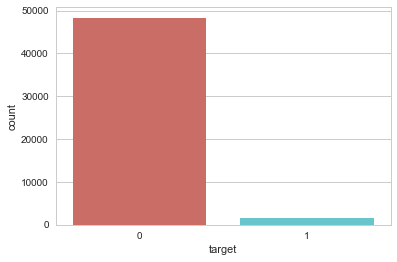

In [306]:
#Step 3 -Visualize The Data to determine which method(s) to use
sns.countplot(x='target',data=df, palette='hls')
plt.show()

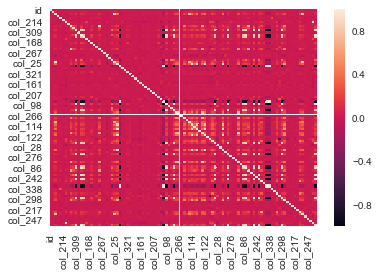

(50000, 104)


In [307]:
# continued visulaizations
sns.heatmap(df.corr())
plt.show()
print(df.shape)
#the data seems clustered in the form of a rectangular pattern in four different areas

In [265]:
df.shape

(50000, 104)

In [266]:
#Step 4 - Logistic Regression
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.08)

In [267]:
train.shape

(46000, 104)

In [268]:
test.shape

(4000, 104)

In [269]:
train.head(3)

,id,target,col_24,col_263,col_264,col_214,col_39,col_280,col_140,col_328,...,col_257,col_217,col_262,col_53,col_17,col_259,col_247,col_287,col_990,col_991
1145,266839,0,0.995508,0,0,0,0.382353,0,0.011236,0,...,0,0,0,0.1250,0.230769,0,0,0,25,-1
28833,151773,0,0.999985,0,0,0,0.176471,0,0.011236,0,...,0,0,0,0.0000,0.153846,0,0,0,11,-1
6245,473664,1,0.997491,0,0,0,0.411765,0,0.011236,0,...,0,0,0,0.0625,0.153846,0,0,0,27,0


In [270]:
train.iloc[:,:10].head(5)

,id,target,col_24,col_263,col_264,col_214,col_39,col_280,col_140,col_328
1145,266839,0,0.995508,0,0,0,0.382353,0,0.011236,0
28833,151773,0,0.999985,0,0,0,0.176471,0,0.011236,0
6245,473664,1,0.997491,0,0,0,0.411765,0,0.011236,0
5847,356338,0,0.997502,0,0,0,0.161765,0,0.011236,0
18129,166972,0,0.999975,0,0,0,0.102941,0,0.011236,0


In [271]:
#feautures = features other than the target 
#iloc for feuatures can be tweaked to include more columns 
#of the data however in this case results will be similar
train_feat = train.iloc[:,:10]
train_target = train['target']

In [272]:
#looking at the shape to make sure there are potential errors or unwanted differences between target and feautures
train_feat.shape
train_targ.shape

(46000,)

In [273]:
test_feat = test.iloc[:,:10]
test_targ = test['target']

In [274]:
type(train_targ)
type(train_targ.shape)

tuple

In [275]:
train[['target']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46000 entries, 1145 to 33952
Data columns (total 1 columns):
target    46000 non-null int64
dtypes: int64(1)
memory usage: 718.8 KB


In [276]:
lr.fit(train_feat, train_targ)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
#the fit of the logistic regression model(how good it is)
lr.score(train_feat, train_targ)

0.967

In [278]:
lr.coef_

array([[-1.40962822e-05,  7.93781055e-11, -1.07857963e-10,
        -3.40481085e-15, -1.43822251e-11, -3.45493046e-12,
        -4.99122750e-11, -4.44023560e-13, -5.21405396e-12,
        -2.17810683e-12]])

In [279]:
lr.predict

<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [280]:
#finding out log odds ratios
np.transpose(lr.coef_)

array([[-1.40962822e-05],
       [ 7.93781055e-11],
       [-1.07857963e-10],
       [-3.40481085e-15],
       [-1.43822251e-11],
       [-3.45493046e-12],
       [-4.99122750e-11],
       [-4.44023560e-13],
       [-5.21405396e-12],
       [-2.17810683e-12]])

In [281]:
#Apply to test dataset that is novel to the machine learning model
lr.score(test_feat, test_targ)

0.96625

In [282]:
#compare the test and train data score 

In [283]:
#evalution metrics to see how well the model performed
from sklearn.metrics import confusion_matrix

In [284]:
#from the training data set, out model got 38672 negative & postive 1328 cases correct
#0 false negatives and positives
confusion_matrix(lr.predict(train_feat), train_targ)

array([[44482,  1518],
       [    0,     0]])

In [285]:
#from the training data set, out model got 9675 negative & 325 postive cases co
#0 false negatives and positives
confusion_matrix(lr.predict(test_feat), test_targ)

array([[3865,  135],
       [   0,    0]])

In [286]:
#Step 5 - Random Forest Classifier (to observe how another model works for the classification)
rfc.fit(train_feat, train_targ)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [287]:
rfc.score(train_feat, train_targ)

1.0

In [288]:
rfc.score(test_feat, test_targ)

1.0

In [289]:
rfc.predict(train_feat)[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [259]:
preds = rfc.predict(train_feat)
print(preds)

[0 0 0 ... 0 0 0]


In [260]:
confusion_matrix(rfc.predict(train_feat), train_targ)
#100 percent accuracy

array([[44482,     0],
       [    0,  1518]])

In [290]:
confusion_matrix(rfc.predict(test_feat), test_targ)
#100 percent accuracy

array([[3865,    0],
       [   0,  135]])

In [293]:
#a)

#The model has over fitted both models especially the random forest classifier
#THE REASONS FOR this is the homogeneous target value of 0, 
#since there is no variaty in the target the model fits too well 
#and will face problem when it is presented different values

#b) 
#In this demonstration I have used logistic regression for binary classification(utilizing scikitlearn)
#and a RandomForestClassifier, to access the performance of the methods, confusion_matrix method from sklearn.metrics was used
#the confusion matrix illustrates an array presenting the correct positives and negatives on the top and false positive and negatives on the bottom
#

#In the other py file I chose to use an ANN for logistic regression, see ---- for further explainations


#c)
#The pros and cons of logistic regression 
# pros: +works well with binary classification +low variance
# cons: -there is a high bias - the model is likely to perform poorly if exposed to new and different values 
#he pros and cons of Random Forest Classifier 
# pros: + good for multiple features like in this example
# cons: - when the target value has no diversity, overfitting is prominent
# Pros and cons of ANN for binary classification
# pros: + better predictions
# cons: - takes a long time to train with big datasets